# Лабораторная работа 2, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий в ЛР 1

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge

Сделаем предобработку данных

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')
shelter_data = shelter_data.sample(frac=0.4, random_state=42)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [ ]:
# Инициализация и обучение логистической регрессии
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_shelter, y_train_shelter)

LogisticRegression(max_iter=500, random_state=42)

Оценка качества модели

Accuracy: 0.78
F1 Score: 0.73
Recall: 0.72
Precision: 0.75


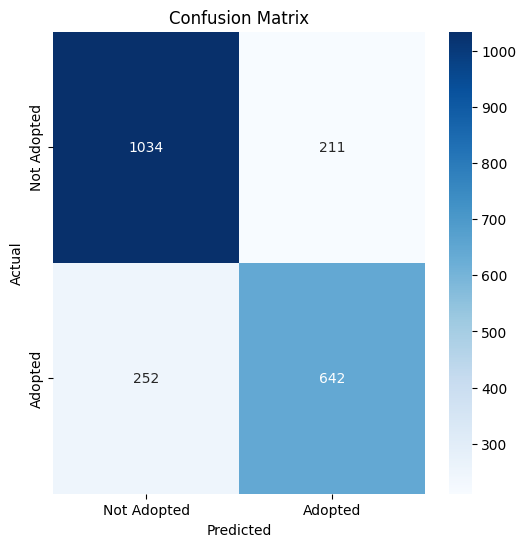

In [ ]:
# Предсказание
y_pred_shelter = log_reg.predict(X_test_shelter)

# Метрики качества
accuracy = accuracy_score(y_test_shelter, y_pred_shelter)
f1 = f1_score(y_test_shelter, y_pred_shelter)
recall = recall_score(y_test_shelter, y_pred_shelter)
precision = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [ ]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [31]:
# Инициализация и обучение линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train_house, y_train_house)

LinearRegression()

Оценка качества модели

In [32]:
# Предсказание
y_pred_house = lin_reg.predict(X_test_house)

# Метрики качества
mae = mean_absolute_error(y_test_house, y_pred_house)
rmse = root_mean_squared_error(y_test_house, y_pred_house)
r2 = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 143347.52
Root Mean Squared Error (RMSE): 229351.96
R^2 Score: 0.65


## 3. Улучшение бейзлайна

### a. Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

1. Улучшение предобработки данных: нормализация или стандартизация

2. Формирование новых признаков на основе комбинации существующих

3. Подбор гиперпараметров: Grid Search с кросс-валидацией для оптимизации модели

### b.1 Проверка гипотез для задачи классификации

1. Улучшение предобработки данных (масштабирование и нормализация)

In [33]:
# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели логистической регрессии
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_scaled = log_reg.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Логистическая регрессия: гипотеза 1 (масштабирование)")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1:.2f}")

Логистическая регрессия: гипотеза 1 (масштабирование)
Accuracy: 0.77
F1 Score: 0.72
Recall: 0.71
Precision: 0.73

Сравнение с бейзлайном:
Разница в Accuracy: -0.01
Разница в F1 Score: -0.02


2. Формирование новых признаков

In [34]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = log_reg.predict(X_test_shelter_scaled)
accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Улучшение: добавление нового признака (AgeInDays)")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1:.2f}")

Улучшение: добавление нового признака (AgeInDays)
Accuracy: 0.77
F1 Score: 0.72
Recall: 0.71
Precision: 0.73

Сравнение с бейзлайном:
Разница в Accuracy: -0.01
Разница в F1 Score: -0.01


3. Подбор гиперпараметров

In [35]:
# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Определяем сетку гиперпараметров
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_log_reg = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_log_reg.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

# Вывод результатов
print("Улучшение: подбор гиперпараметров (Grid Search)")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy:.2f}")
print(f"Разница в F1 Score: {f1_best - f1:.2f}")


Лучшие параметры: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Лучшая кросс-валидация: 0.71

Улучшение: подбор гиперпараметров (Grid Search)
Accuracy: 0.78
F1 Score: 0.73
Recall: 0.71
Precision: 0.75

Сравнение с бейзлайном:
Разница в Accuracy: -0.00
Разница в F1 Score: -0.01


### b.2 Проверка гипотез для задачи регрессии

1. Улучшение предобработки данных (масштабирование и нормализация)

In [36]:
# Масштабирование данных
scaler_house = StandardScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Обучение линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = lin_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Линейная регрессия: гипотеза 1 (масштабирование)")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse:.2f}")
print(f"Разница в R^2: {r2_scaled - r2:.2f}")

Линейная регрессия: гипотеза 1 (масштабирование)
Mean Absolute Error (MAE): 143455.41
Root Mean Squared Error (RMSE): 229348.30
R-squared (R^2): 0.65

Сравнение с бейзлайном:
Разница в MAE: 107.89
Разница в RMSE: -3.67
Разница в R^2: 0.00


2. Формирование новых признаков

In [37]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели
lin_reg = LinearRegression()
lin_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = lin_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Улучшение: добавление нового признака (total_area)")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared  Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2:.2f}")

Улучшение: добавление нового признака (total_area)
Mean Absolute Error (MAE): 143431.59
Root Mean Squared  Error (RMSE): 229349.05
R-squared (R^2): 0.65

Сравнение с бейзлайном:
Разница в MAE: 84.07
Разница в RMSE: -2.91
Разница в R^2: 0.00


3. Подбор гиперпараметров

In [38]:
# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

# Подбор гиперпараметров
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_house_scaled, y_train_house)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая кросс-валидация: ", grid_search.best_score_)
print()

# Лучшие параметры и метрики
best_ridge = grid_search.best_estimator_
y_pred_house_gs = best_ridge.predict(X_test_house_scaled)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

print("Улучшение: подбор гиперпараметров (Grid Search)")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse:.2f}")
print(f"Разница в R^2: {r2_gs - r2:.2f}")

Лучшие параметры:  {'alpha': 100}
Лучшая кросс-валидация:  0.6506351896809737

Улучшение: подбор гиперпараметров (Grid Search)
Mean Absolute Error (MAE): 143552.07
Root Mean Squared Error (RMSE): 229344.25
R-squared (R^2): 0.65

Сравнение с бейзлайном:
Разница в MAE: 204.55
Разница в RMSE: -7.71
Разница в R^2: 0.00


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'alpha': 100}

Классификация

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')
shelter_data = shelter_data.sample(frac=0.4, random_state=42)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

Регрессия

In [ ]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

lin_reg = Ridge(alpha=100, random_state=42)

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [44]:
log_reg.fit(X_train_shelter, y_train_shelter)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

Регрессия

In [45]:
lin_reg.fit(X_train_house, y_train_house)

Ridge(alpha=100, random_state=42)

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [46]:
# Предсказание
y_pred_shelter_best = log_reg.predict(X_test_shelter)

# Метрики качества
accuracy_best = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy_best: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")

Accuracy_best: 0.78
F1 Score: 0.73
Recall: 0.71
Precision: 0.75


Регрессия

In [47]:
# Предсказание
y_pred_house_best = lin_reg.predict(X_test_house)

# Метрики качества
mae_best = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R-squared (R^2): {r2_best}")

Mean Absolute Error (MAE): 143536.00839727712
Root Mean Squared Error (RMSE): 229345.61450714277
R-squared (R^2): 0.6520667098230712


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [48]:
print(f"Разница в accuracy: {accuracy_best - accuracy}")
print(f"Разница в F1 Score: {f1_best - f1}")

Разница в accuracy: -0.004207573632538653
Разница в F1 Score: -0.006238609373046766


Регрессия

In [49]:
print(f"Разница в MAE: {mae_best - mae}")
print(f"Разница в MSE: {rmse_best - rmse}")
print(f"Разница в R^2: {r2_best - r2}")

Разница в MAE: 188.48854228996788
Разница в MSE: -6.348902503930731
Разница в R^2: 1.9263722285667306e-05


### g. Выводы

**Вывод по классификации:**

Внедрение улучшений практически не изменило результаты

**Вывод по регрессии:**

Улучшения немного повысили MAE, незначительно повысили R^2, однако понизили RMSE

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

KNN для классификации

In [53]:
import numpy as np


class LogisticRegressionCustom:
    def __init__(self, lr=0.01, max_iter=1000, penalty=None, C=1.0, tol=1e-4):
        """
        Логистическая регрессия с опцией регуляризации.
        
        :param lr: скорость обучения.
        :param max_iter: максимальное количество итераций.
        :param penalty: тип регуляризации ('l1', 'l2' или None).
        :param C: обратный коэффициент регуляризации (больше C -> слабее регуляризация).
        :param tol: критерий сходимости (толерантность).
        """
        self.lr = lr
        self.max_iter = max_iter
        self.penalty = penalty
        self.C = C
        self.tol = tol

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X_train, y_train):
        """
        Обучение модели на тренировочных данных.
        
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие метки (вектор длины N).
        """
        self.X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Добавление столбца для bias
        self.y_train = y_train
        self.weights = np.zeros(self.X_train.shape[1])  # Инициализация весов
        
        for _ in range(self.max_iter):
            predictions = self._sigmoid(np.dot(self.X_train, self.weights))
            errors = predictions - self.y_train
            gradient = np.dot(self.X_train.T, errors) / len(y_train)
            
            # Регуляризация
            if self.penalty == 'l2':
                gradient += (1 / self.C) * self.weights
            elif self.penalty == 'l1':
                gradient += (1 / self.C) * np.sign(self.weights)
            
            # Обновление весов
            self.weights -= self.lr * gradient
            
            # Проверка сходимости
            if np.linalg.norm(gradient) < self.tol:
                break

    def predict_proba(self, X_test):
        """
        Вероятности предсказания для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: массив вероятностей (длины L).
        """
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

        return self._sigmoid(np.dot(X_test, self.weights))

    def predict(self, X_test):
        """
        Предсказание классов для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: массив предсказанных меток (длины L).
        """
        probabilities = self.predict_proba(X_test)

        return (probabilities >= 0.5).astype(int)

KNN для регрессии

In [54]:
class LinearRegressionCustom:
    def __init__(self, lr=0.01, max_iter=1000, penalty=None, alpha=0.0, tol=1e-4):
        """
        Линейная регрессия с опцией регуляризации.
        
        :param lr: скорость обучения.
        :param max_iter: максимальное количество итераций.
        :param penalty: тип регуляризации ('l1', 'l2' или None).
        :param alpha: коэффициент регуляризации.
        :param tol: критерий сходимости (толерантность).
        """
        self.lr = lr
        self.max_iter = max_iter
        self.penalty = penalty
        self.alpha = alpha
        self.tol = tol

    def fit(self, X_train, y_train):
        """
        Обучение модели на тренировочных данных.
        
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие целевые значения (вектор длины N).
        """
        self.X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Добавление столбца для bias
        self.y_train = y_train
        self.weights = np.zeros(self.X_train.shape[1])  # Инициализация весов
        
        for _ in range(self.max_iter):
            predictions = np.dot(self.X_train, self.weights)
            errors = predictions - self.y_train
            gradient = np.dot(self.X_train.T, errors) / len(y_train)
            
            # Регуляризация
            if self.penalty == 'l2':
                gradient += (2 * self.alpha) * self.weights
            elif self.penalty == 'l1':
                gradient += self.alpha * np.sign(self.weights)
            
            # Обновление весов
            self.weights -= self.lr * gradient
            
            # Проверка сходимости
            if np.linalg.norm(gradient) < self.tol:
                break

    def predict(self, X_test):
        """
        Предсказание целевых значений для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: массив предсказанных значений (длины L).
        """
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        
        return np.dot(X_test, self.weights)

### b. Обучение имплементированной модели

Классификация

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')
shelter_data = shelter_data.sample(frac=0.4, random_state=42)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

log_reg  = LogisticRegressionCustom()
log_reg.fit(X_train_shelter, y_train_shelter)

Регрессия

In [ ]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

lin_reg = LinearRegressionCustom()
lin_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.73
F1 Score: 0.53
Recall: 0.36
Precision: 0.96


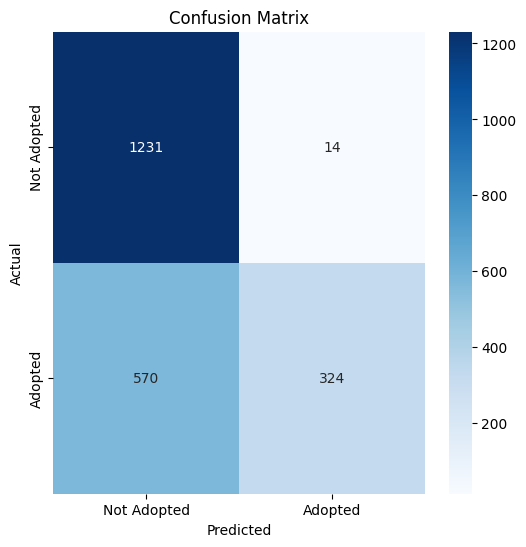

In [59]:
# Предсказание
y_pred_shelter = log_reg.predict(X_test_shelter)

# Метрики качества
accuracy_2 = accuracy_score(y_test_shelter, y_pred_shelter)
f1_2 = f1_score(y_test_shelter, y_pred_shelter)
recall_2 = recall_score(y_test_shelter, y_pred_shelter)
precision_2 = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_2:.2f}")
print(f"F1 Score: {f1_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"Precision: {precision_2:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [64]:
# Предсказание
y_pred_house = lin_reg.predict(X_test_house)

# Метрики качества
mae_2 = mean_absolute_error(y_test_house, y_pred_house)
rmse_2 = root_mean_squared_error(y_test_house, y_pred_house)
r2_2 = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_2}")
print(f"Root Mean Squared Error (RMSE): {rmse_2}")
print(f"R-squared (R^2): {r2_2}")

Mean Absolute Error (MAE): 143642.62543154994
Root Mean Squared Error (RMSE): 229342.4285694762
R-squared (R^2): 0.6520763763351407


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [61]:
print(f"Разница в accuracy: {accuracy_2 - accuracy}")
print(f"Разница в F1 Score: {f1_2 - f1}")

Разница в accuracy: -0.05656848994857411
Разница в F1 Score: -0.2090002155829288


Регрессия

In [65]:
print(f"Разница в MAE: {mae_2 - mae}")
print(f"Разница в RMSE: {rmse_2 - rmse}")
print(f"Разница в R^2: {r2_2 - r2}")

Разница в MAE: 295.1055765627825
Разница в RMSE: -9.534840170497773
Разница в R^2: 2.893023435512898e-05


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась хуже, чем для встроенной модели. Особенно пострадал Recall

В случае с линейной регрессией, MAE увеличилась, RMSE уменьшилась, R^2 остался практически идентичным

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [ ]:
# Загрузка данных
shelter_data = pd.read_csv('../datasets/shelter_animal_outcomes.csv')
shelter_data = shelter_data.sample(frac=0.4, random_state=42)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

Регрессия

In [ ]:
# Загрузка данных
house_data = pd.read_csv('../datasets/kc_house_data.csv')

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

lin_reg = LinearRegressionCustom(alpha=100)

### g. Обучение на улучшенном бейзлайне

Классификация

In [69]:
log_reg.fit(X_train_shelter, y_train_shelter)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

Регрессия

In [70]:
lin_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.78
F1 Score: 0.73
Recall: 0.71
Precision: 0.75


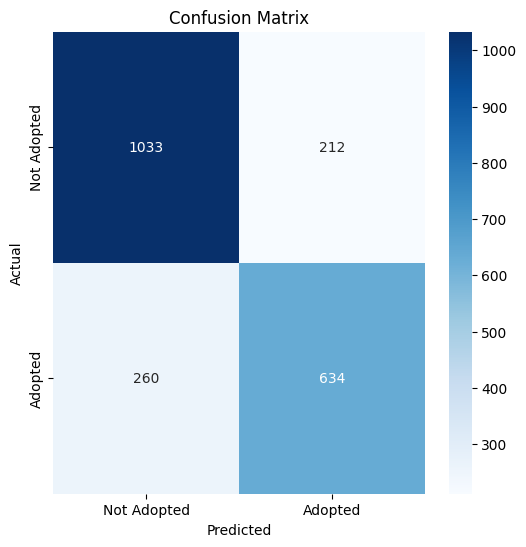

In [71]:
# Предсказание
y_pred_shelter_best = log_reg.predict(X_test_shelter)

# Метрики качества
accuracy_2_best = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_2_best = f1_score(y_test_shelter, y_pred_shelter_best)
recall_2_best = recall_score(y_test_shelter, y_pred_shelter_best)
precision_2_best = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_2_best:.2f}")
print(f"F1 Score: {f1_2_best:.2f}")
print(f"Recall: {recall_2_best:.2f}")
print(f"Precision: {precision_2_best:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [72]:
# Предсказание
y_pred_house_best = lin_reg.predict(X_test_house)

# Метрики качества
mae_2_best = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_2_best = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_2_best = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_2_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_2_best}")
print(f"R-squared (R^2): {r2_2_best}")

Mean Absolute Error (MAE): 143643.46657838917
Root Mean Squared Error (RMSE): 229339.67455045518
R-squared (R^2): 0.6520847322466943


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [73]:
print(f"Разница в accuracy: {accuracy_2_best - accuracy_best}")
print(f"Разница в F1 Score: {f1_2_best - f1_best}")

Разница в accuracy: 0.0
Разница в F1 Score: 0.0


Регрессия

In [74]:
print(f"Разница в MAE: {mae_2_best - mae_best}")
print(f"Разница в MSE: {rmse_2_best - rmse_best}")
print(f"Разница в R^2: {r2_2_best - r2_best}")

Разница в MAE: 107.45818111204426
Разница в MSE: -5.939956687594531
Разница в R^2: 1.802242362303197e-05


### j. Выводы

Точность имплементированной модели логистической регрессии с улучшениями для задачи классификации оказалась идентичной встроенной модели

MAE для имплементированной модели линейной регрессии с улучшениями немного повысилась, а MSE, напротив, уменьшилась, однако незначительно, R^2 остался практически идентичным